In [1]:
# librerias necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# leer el data set
df0 = pd.read_csv('customer_shopping_data.csv')
df0.head(2)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul


In [3]:
df0['invoice_no'].nunique()

99457

In [4]:
df0['customer_id'].nunique()

99457

In [5]:
# forma del df
print(df0.shape)

(99457, 10)


In [6]:
# informacion general del df
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [7]:
# valores unicos del atributo
print('Valores unicos en payment_method:', df0['payment_method'].unique())

# numero de valores diferentes del atributo
print('Numero de valores unicos:', df0['payment_method'].nunique())

Valores unicos en payment_method: ['Credit Card' 'Debit Card' 'Cash']
Numero de valores unicos: 3


In [8]:
# valores unicos del atributo
print('Valores unicos en gender:', df0['gender'].unique())

Valores unicos en gender: ['Female' 'Male']


In [9]:
# Copia del df antes de modificar los datos
df1 = df0.copy()

In [10]:
# Convertir el 'invoice data' en fecha
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], dayfirst=True)

In [11]:
print(df1['invoice_date'].head(3))

0   2022-08-05
1   2021-12-12
2   2021-11-09
Name: invoice_date, dtype: datetime64[ns]


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


In [13]:
# agregar columnas para años
df1['year'] = df1['invoice_date'].dt.strftime('%Y')

In [14]:
# agregar columnas para meses
df1['month'] = df1['invoice_date'].dt.month

In [15]:
df1.head(3)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11


In [16]:
# nombre de los atributos del df
columns_name = df1.columns.to_list()
print(columns_name)

['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity', 'price', 'payment_method', 'invoice_date', 'shopping_mall', 'year', 'month']


In [17]:
columns_name2 = ['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity', 'price', 'payment_method', 'invoice_date', 'year', 'month', 'shopping_mall']

In [18]:
# df1 con los atributos ordenados
df1_2 = df1[columns_name2]

In [19]:
df1_2.head(2)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,year,month,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,2022,8,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,2021,12,Forum Istanbul


### .1 Como es la relacion de género y número de transacciones

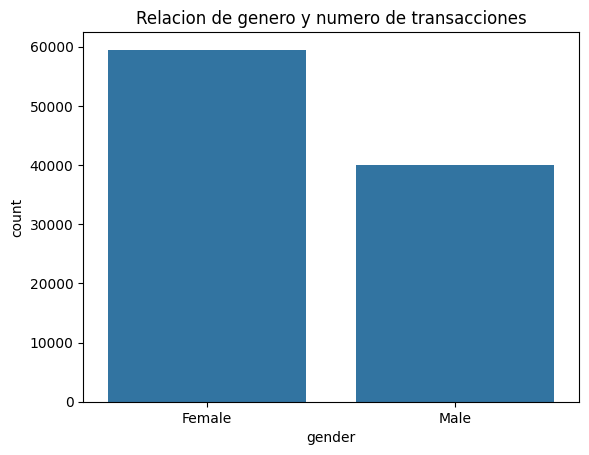

In [20]:
# Histograma: cantidad de hombres y mujeres
sns.countplot(data=df1, x='gender').set(title='Relacion de genero y numero de transacciones');

In [21]:
# .value_counts() cantidad de elementos por categoria
gender_quantity = df1['gender'].value_counts()
gender_quantity

gender
Female    59482
Male      39975
Name: count, dtype: int64

In [22]:
# resetear el indice y trabajar con un df
df_gender = df1['gender'].value_counts().reset_index()
df_gender.shape

(2, 2)

In [23]:
df_gender

,gender,count
0,Female,59482
1,Male,39975


Text(0.5, 1.0, 'Relacion de transacciones entre mujeres y hombres')

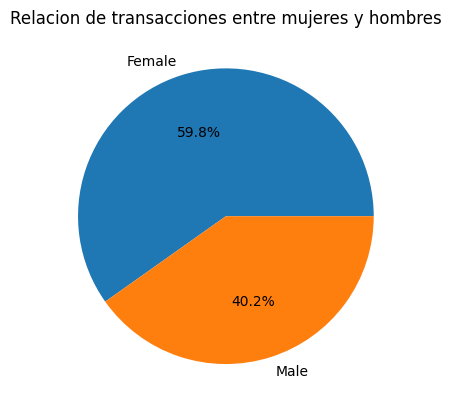

In [24]:
plt.pie(gender_quantity, labels=gender_quantity.index, autopct='%1.1f%%')
plt.title('Relacion de transacciones entre mujeres y hombres')

### .2 Como es la distribución de edades por número de transacciones

In [25]:
df2 = df1_2.copy()

In [26]:
df2.head(2)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,year,month,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,2022,8,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,2021,12,Forum Istanbul


In [27]:
df2['age'].describe()

count    99457.000000
mean        43.427089
std         14.990054
min         18.000000
25%         30.000000
50%         43.000000
75%         56.000000
max         69.000000
Name: age, dtype: float64

In [28]:
# nueva columna para categorias de edades
df2['age_cat'] = df2['age']

In [29]:

# Categoria de edades.Funcion para definir categorias de edad
# Gen Z: 18-24, Millenials: 25-34, Gen X: 35-49, Gen Boomers: 50-64, Gen S: 65 en adelante
def category_f(age):
    if (age >= 18) and (age < 24):
        return 'Gen Z'
    elif (age >= 25) and (age < 34):
        return 'Millenials'
    elif (age >= 35) and (age < 49):
        return 'Gen X'
    elif (age >= 50) and (age < 64):
        return 'Boomers'
    else: 
        return 'Gen S'

In [30]:
# Aplicamos la funcion 
df2['age_cat'] = df2['age_cat'].apply(category_f)

In [31]:
# Confirmamos que la funcion hace el trabajo
df2[['age', 'age_cat']].tail(5)

,age,age_cat
99452,45,Gen X
99453,27,Millenials
99454,63,Boomers
99455,56,Boomers
99456,36,Gen X


[Text(0.5, 1.0, 'Edades por transaccion')]

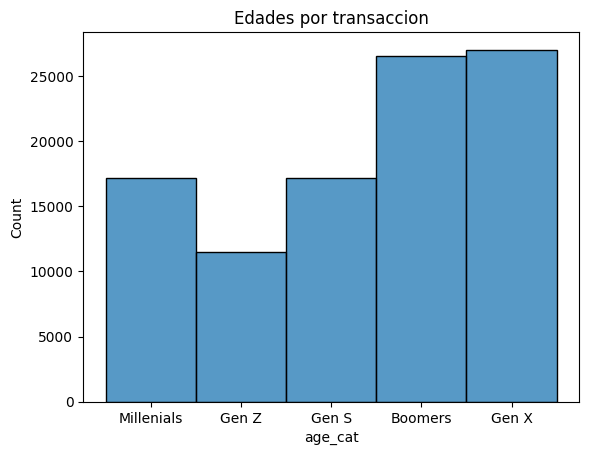

In [32]:
# Histograma
sns.histplot(data=df2, x='age_cat').set(title='Edades por transaccion')

In [33]:
df2.head(3)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,year,month,shopping_mall,age_cat
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,2022,8,Kanyon,Millenials
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,2021,12,Forum Istanbul,Gen Z
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,2021,11,Metrocity,Gen Z
